<a href="https://colab.research.google.com/github/gustavor10silva/knn/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introdução

Este notebook trata do método KNN (K-Nearest Neighbors ou K Vizinhos Próximos), que pode ser usado tanto para classificação quanto para regressão.

Na prática, o KNN é pouco usado para a regressão, então neste notebook o foco será dado ao seu uso em tarefas de classificação.

Este [vídeo](https://www.youtube.com/watch?v=FJDafd16AD0&list=PLOOY0eChA1ux4hJ_aIA2IiUYkLOSYDQDY&index=3&ab_channel=AbelSiqueira) ilustra bem como funciona o método KNN, tanto para classificação quanto para regressão. Este [artigo](https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/) é uma ótima referência sobre o funcionamento do KNN para classificação (inclusive, as imagens usadas neste notebook são desse artigo).

# 2 Funcionamento do KNN

Considere a seguinte situação, onde temos dados da Classe A (vermelho), dados da Classe B (verde) e um dado novo que queremos classificá-lo (interrogação), que chamaremos de ponto P:

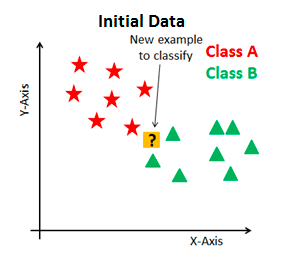

O método KNN faz o seguinte:

1.   Calcula as distâncias do ponto P até todos os outros;
2.   Encontra os K pontos/vizinhos mais próximos;
3.   Atribui a P a classe que ocorre mais vezes dentre os K vizinhos mais próximos.

Abaixo, temos a ilustração para $K=3$ e $K=7$:

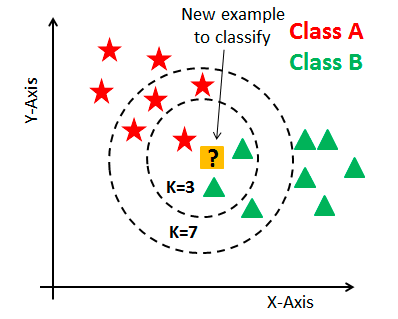

Na ilustração acima, note que:

* Para $K=3$, temos 2 vizinhos da Classe B e 1 vizinho da Classe A, então nessa situação, a classe de P seria B;

* Para $K=7$, temos 3 vizinhos da Classe B e 4 vizinhos da Classe A, então nessa situação, a classe de P seria A;

Com isso, note duas coisas:

* A métrica de distância é importantíssima para o KNN. Existem vários tipos de distância que podem ser utilizados: Euclidiana, Hamming, Manhattan, Markowski etc;

* A escolha de $K$ é crucial para o funcionamento do KNN.

# 3 Preparação dos dados

Para esta classificação, será utilizado o dataset [Mobile Price Classification](https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv), que possui variáveis sobre celulares e a variável `price_range` (categoria do preço do celular, que pode ser 0, 1, 2 ou 3). Neste notebook, queremos prever justamente a categoria `price_range` do conjunto de teste.

Os dados de teste deste dataset não possuem a classe `price_range` disponível para download, então não usarei estes dados de teste. Em vez disso, dividirei os dados de treino entre treino e teste usando o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para prosseguir neste notebook.

Dessa forma, teremos as classes do conjunto de teste e poderemos avaliar se o modelo está indo bem ou não.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("\content\drive")

In [ ]:
train = pd.read_csv('/content/contentdrive/MyDrive/Portfólio Ciência de Dados/Supervisionado/Classificação/mobile_price_train.csv')

train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Veja que o nosso conjunto de treino é composto por 2000 dados com 21 variáveis (incluindo a classe do preço), todas numéricas:

In [ ]:
train.shape

(2000, 21)

Vamos separar os dados de treino entre $X$ (variáveis preditoras) e $y$ (classe `price_range`) e dividir entre treino (70%) e teste (30%):

In [ ]:
from sklearn.model_selection import train_test_split

# separando entre X e y
X = train.drop(columns=['price_range'])
y = train['price_range']

# dividindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4 Exemplo de treino e teste

Vejamos um exemplo inicial de uso do KNN usando $K=3$. Vamos treinar o modelo no conjunto de treino:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Tendo o modelo treinado com os dados de treino, podemos fazer predições para as classes dos dados de teste. Vejamos:

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 1, 3, 2, 0, 1, 1,
       0, 0, 3, 2, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 2, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 2, 1, 0, 1,
       1, 1, 1, 1, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 3, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 2, 3, 0, 2, 2,
       2, 1, 3, 0, 1, 3, 2, 3, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

Existem vários métodos para avaliar a qualidade da classificação (veremos isso detalhadamente no fim do notebook), mas de exemplo, podemos avaliar a qualidade dessa classificação inicial usando a [acurácia](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html):

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9133333333333333

Isso significa que o nosso modelo KNN com $K=3$ que treinamos no conjunto de treino acertou 91,33% das classes do conjunto de teste.

A seguir, repetiremos o procedimento feito nesta seção. Porém, buscando tunar o KNN para obtermos um resultado melhor.

# 5 Normalização

Antes de tudo, quando trabalhamos com classificação via KNN, a classificação é inteiramente feita com base nas distâncias entre os dados, de acordo com alguma métrica de distância.

Dito isso, analisemos a seguinte situação:



In [ ]:
X_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1240.340000,0.493571,1.525714,0.523571,4.266429,0.527857,32.240714,0.506714,140.642143,4.566429,9.900000,639.420714,1246.348571,2122.587143,12.18500,5.652143,10.948571,0.764286,0.504286,0.499286
std,443.072483,0.500137,0.825121,0.499623,4.323384,0.499402,18.257077,0.287973,35.326171,2.295818,6.021406,439.947985,430.391384,1082.677894,4.22399,4.364683,5.490410,0.424596,0.500160,0.500178
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.00000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,283.250000,872.750000,1214.000000,9.00000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1229.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,5.000000,10.000000,553.000000,1235.000000,2119.500000,12.00000,5.000000,11.000000,1.000000,1.000000,0.000000
75%,1625.500000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,171.000000,7.000000,15.000000,942.000000,1617.000000,3056.250000,16.00000,8.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1949.000000,1998.000000,3998.000000,19.00000,18.000000,20.000000,1.000000,1.000000,1.000000


Com base no describe do $X\_train$, feito acima, podemos ver que:

* A variável `fc` possui média 4.26, mínimo 0 e máximo 19;
* A variável `ram` possui média 2122.58, mínimo 258 e máximo 3998.

Como a classificação é feita com base nas distâncias entre os dados, de acordo com alguma métrica de distância, qual variável é mais relevante para o modelo? `fc` ou `ram`?

Como a variável `ram` possui uma variação muito maior de valores, ela terá peso muito maior quando o KNN calcular as distâncias entre os dados e, consequentemente, essa variável será mais importante para o modelo do que a variável `fc`. Isso pode ser algo positivo ou negativo para o resultado final.

Diante disso, o que podemos fazer é normalizar os dados, compararmos os resultados com e sem normalização e usarmos os dados da maneira que gerou o melhor resultado.

Com a normalização, vamos redistribuir os dados de todas as colunas para que, em cada coluna, os dados estejam com média 0 e desvio padrão 1. Na prática, isso significa que a maior parte (mas não todos) dos dados estará entre -1 e 1. Faremos isso com o comando [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Também é possível transformar os dados para que fiquem entre dois valores min e max pré-estabelecidos com o comando [Min Max Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

Com isso, todos os dados terão praticamente o mesmo peso nos cálculos do modelo!

Neste notebook, faremos a normalização com o StardardScaler, que transforma cada valor $x$ fazendo o seguinte:

$$ z = \dfrac{(x - u)}{s} $$

Onde:

* $x$ é o valor sem normalização;
* $u$ é a média do conjunto de dados;
* $s$ é o desvio padrão do conjunto de dados;
* $z$ é o valor de $x$ depois da normalização.

Este [artigo](https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657) explica sobre a normalização com o StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Agora, os dados em `X_train_scaled` e `X_test_scaled` estão com média 0 e desvio padrão 1 (aproximadamente), como podemos ver:

In [ ]:
# calculando a média e o desvio padrão do X_train_scaled
X_train_scaled.mean(), X_train_scaled.std()

(1.4210854715202004e-17, 0.9999999999999999)

Note que a média e o desvio padrão dos dados escalados do treino são muito próximos a zero e um, respectivamente. Por outro lado, no conjunto de teste isso pode não acontecer, pois estamos usando a média e o desvio padrão do treino para normalizá-lo.

In [ ]:
# calculando a média e o desvio padrão do X_test_scaled
X_test_scaled.mean(), X_test_scaled.std()

(0.0010871561301763653, 1.0001738395464774)

Vejamos os valores do X_train depois da normalização:

In [ ]:
X_train_scaled

array([[-0.7638951 ,  1.01294087, -1.12231393, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-0.09785191,  1.01294087, -1.24355155, ...,  0.55534783,
         0.99146499,  1.00142959],
       [ 0.62915118, -0.98722446,  0.69625031, ...,  0.55534783,
         0.99146499, -0.99857245],
       ...,
       [ 1.32906098,  1.01294087, -1.24355155, ...,  0.55534783,
        -1.00860848,  1.00142959],
       [ 1.55032279, -0.98722446, -0.75860108, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-1.36672064,  1.01294087, -1.12231393, ...,  0.55534783,
        -1.00860848, -0.99857245]])

Note que $X\_train\_scaled$ não é um dataframe, mas sim um array. Vejamos a distribuição dos dados depois da normalização, mas para isso precisamos transform:

In [ ]:
teste2 = pd.DataFrame(X_train_scaled)
teste2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03
mean,1.505145e-16,-1.903239e-17,-1.195869e-16,2.252167e-17,2.196656e-17,1.557484e-16,1.421085e-16,3.267228e-17,1.792217e-17,5.905990e-17,-3.576504e-17,-9.738242e-17,8.009466e-17,1.681889e-16,-7.309629e-17,-6.946824e-17,4.900842e-17,2.421872e-16,-5.709718e-17,-3.907192e-16
std,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00
min,-1.669262e+00,-9.872245e-01,-1.243552e+00,-1.048308e+00,-9.871787e-01,-1.057357e+00,-1.656975e+00,-1.412840e+00,-1.717248e+00,-1.554001e+00,-1.644722e+00,-1.453920e+00,-1.734736e+00,-1.722815e+00,-1.701606e+00,-1.295435e+00,-1.630437e+00,-1.800673e+00,-1.008608e+00,-9.985724e-01
25%,-8.767838e-01,-9.872245e-01,-1.001076e+00,-1.048308e+00,-7.557958e-01,-1.057357e+00,-8.898751e-01,-1.065461e+00,-8.960340e-01,-6.825403e-01,-8.140543e-01,-8.098639e-01,-8.683540e-01,-8.395034e-01,-7.542959e-01,-8.370477e-01,-9.016339e-01,5.553478e-01,-1.008608e+00,-9.985724e-01
50%,-2.560315e-02,-9.872245e-01,-3.117539e-02,9.539177e-01,-2.930299e-01,9.457547e-01,-1.318942e-02,-2.332401e-02,1.013371e-02,1.889202e-01,1.661335e-02,-1.965041e-01,-2.637745e-02,-2.852414e-03,-4.381310e-02,-1.494669e-01,9.370329e-03,5.553478e-01,9.914650e-01,-9.985724e-01
75%,8.696041e-01,1.012941e+00,9.387255e-01,9.539177e-01,6.325018e-01,9.457547e-01,8.634962e-01,1.018813e+00,8.596659e-01,1.060381e+00,8.472810e-01,6.880073e-01,8.615039e-01,8.626725e-01,9.034972e-01,5.381138e-01,9.203746e-01,5.553478e-01,9.914650e-01,1.001430e+00
max,1.710625e+00,1.012941e+00,1.787389e+00,9.539177e-01,3.409097e+00,9.457547e-01,1.740182e+00,1.713570e+00,1.680880e+00,1.496111e+00,1.677949e+00,2.977732e+00,1.747061e+00,1.732817e+00,1.613980e+00,2.830049e+00,1.649178e+00,5.553478e-01,9.914650e-01,1.001430e+00


Feito isso nos dados, podemos prosseguir para a construção do nosso modelo KNN. Para ver a diferença entre os resultados com e sem a normalização, faremos primeiro todo o procedimento sem a normalização e, depois, repetiremos com a normalização.

# 6 Escolha dos hiperparâmetros

## 6.1 Motivação

Para melhorar o KNN, podemos ajustar, essencialmente, duas coisas:

* O valor do K;
* A métrica de distância utilizada.

Antes de iniciarmos isso, vejamos a diferença que faz a boa escolha do K no resultado do KNN. 

Nas figuras abaixo, temos os dados de treino com duas classes (amarela e azul) e o resultado do KNN para diferentes valores de K; a linha tracejada representa o modelo ideal (Fonte: G. James et al, An Introduction to Statistical Learning):

Para $K=1$, temos **overfitting**. O modelo sobreajustou no conjunto de treino, mas terá pouca capacidade de generalização. Vejamos:

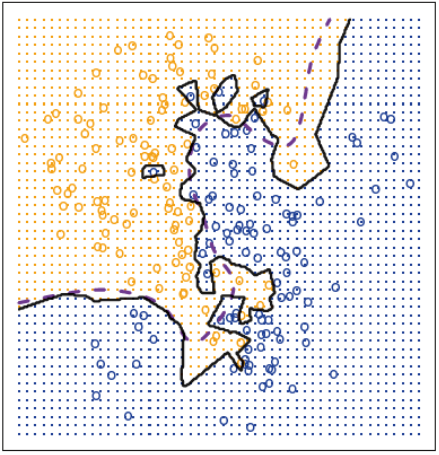

Para $K=100$, temos **underfitting**. O modelo tem uma capacidade de generalização maior, mas não foi capaz de se ajustar às particularidades do conjunto de treino, como segue:

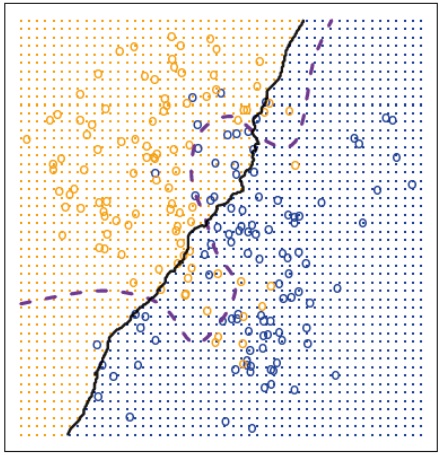

Por outro lado, para $K=10$, temos um modelo mais próximo do ideal, que se ajusta bem nos dados de treino mas também tem uma boa capacidade de generalização:

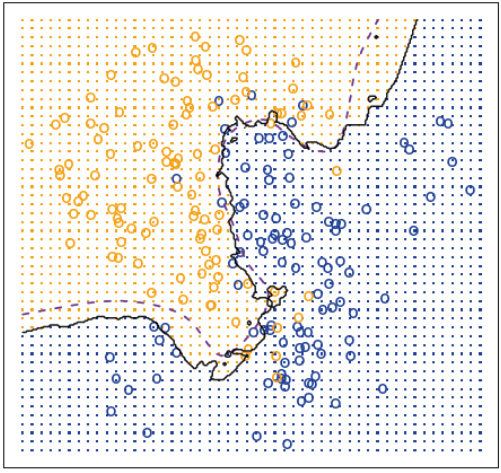

## 6.2 Tunagem

### 6.2.1 Sobre o GridSearch

Abaixo, vamos montar a tunagem no [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). O que o GridSearch faz é receber um dicionário com possíveis valores para cada hiperparâmetro do modelo e, em seguida, treinar e avaliar o modelo com todas as combinações possíveis de valores passados.

Com isso, ao fim do processo, saberemos quais foram os melhores hiperparâmetros dentre aqueles que demos de entrada para o GridSearch.

Vale lembrar que, quanto mais possibilidades de valores passamos para o GridSearch, maior será a assertividade na escolha dos melhores hiperparâmetros; porém, maior será o tempo computacional até o fim do processo, pois serão feitos mais treinamentos.

Para saber quais são os hiperparâmetros do KNN e os possíveis valores para cada um, basta consultar a [Documentação do KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

### 6.2.2 K-Fold Cross Validation

Um parâmetro importante do GridSearch é o CV (Cross Validation). Suponha que passamos cv = k (k é um número inteiro). Isso significa que o GridSearch fará o seguinte:

```
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    3.1 Take the group as a hold out or test data set
    3.2 Take the remaining groups as a training data set
    3.3 Fit a model on the training set and evaluate it on the test set
    3.4 Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores
```

Dito isso, no exemplo abaixo temos cv = 3 com as seguintes quantidades de valores para os hiperparâmetros:

*     n_neighbors: 49;
*     weights: 2;
*     metric: 1;
*     p: 5.

Então será feito um total de $3\cdot 49\cdot 2\cdot 1\cdot  5 = 1470$ treinos. Sabendo disso e observando quanto tempo demora, em média, cada treino, é possível fazer uma estimativa de quão demorado será esse processo.

### 6.2.3 Hiperparâmetros do KNN

Na [documentação do KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), podemos ver os seguintes hiperparâmetros:

* n_neighbors: número de vizinhos que serão utilizados para classificar cada dado novo;
* weights: função que será utilizada para determinar o peso de cada vizinho na atribuição da classificação. Pode ser `uniform` (todos os vizinhos têm o mesmo peso) ou `distance` (os vizinhos mais próximos têm peso maior);
* algorithm: o tipo de algoritmo que será usado para calcular quais são os vizinhos mais próximos;
* leaf_size: parâmetro passado quando o algoritmo é BallTree ou KDTree; 
* p: parâmetro usada na métrica de distância 'minkowski';
* metric: métrica de distância que será utilizada;
* metric_params: parâmetros adicionais que precisam ser passados para algumas métricas de distância;
* n_jobs: número de processadores que serão utilizados para fazer o treinamento.

No GridSearch, usaremos os hiperparâmetros `n_neighbors`, `weights`, `metric`, `p`.

### 6.2.4 GridSearch - sem normalização

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': range(1,50),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2, 3, 5, 10]
}

grid = GridSearchCV(
       KNeighborsClassifier(),
       params,
       verbose = 1,
       cv = 3,
       n_jobs = -1
)

gs_results = grid.fit(X_train, y_train)

Fitting 3 folds for each of 490 candidates, totalling 1470 fits


Com os comandos abaixo, podemos ver qual foi o melhor score obtido durante os treinamentos do GridSearch e qual foi a combinação de hiperparâmetros que gerou o melhor score:

In [ ]:
gs_results.best_score_

0.9364203374046128

In [ ]:
gs_results.best_params_

{'metric': 'minkowski', 'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

Com o comando `.cv_results_`, podemos gerar uma lista com informações de todos os treinamentos que foram feitos:

In [ ]:
cv_results_dict = gs_results.cv_results_
cv_results_dict

{'mean_fit_time': array([0.00455419, 0.00658862, 0.00577545, 0.00432595, 0.00430028,
        0.00585341, 0.00399566, 0.00387112, 0.00405097, 0.00378108,
        0.00410279, 0.00416962, 0.00391531, 0.00404032, 0.00379697,
        0.00585405, 0.00356523, 0.00455888, 0.00385356, 0.00420769,
        0.00383123, 0.00581853, 0.00407736, 0.00559425, 0.00436926,
        0.00555619, 0.00393828, 0.00374174, 0.00392699, 0.00378338,
        0.0038054 , 0.00394917, 0.0055267 , 0.00414578, 0.00390689,
        0.00383059, 0.00406599, 0.00379038, 0.00404429, 0.00387597,
        0.0042398 , 0.00415285, 0.00390196, 0.00586971, 0.00413005,
        0.00364105, 0.00381422, 0.00373165, 0.00388241, 0.00376217,
        0.00399709, 0.00358748, 0.00420133, 0.00425609, 0.0039161 ,
        0.00373816, 0.00406178, 0.00535647, 0.00401402, 0.00499845,
        0.00399137, 0.00391173, 0.00415738, 0.00393629, 0.00401656,
        0.00379403, 0.00395711, 0.00375867, 0.00425267, 0.00365233,
        0.00417264, 0.0039959 ,

Para podermos visualizar, vamos transformar essa lista em um dataframe:

In [ ]:
cv_results = pd.DataFrame(cv_results_dict) # transformando o dicionário cv_results_dict em dataframe
cv_results_sorted = cv_results.sort_values(by=['rank_test_score'], ascending=True) # plotando o dataframe ordenado pela coluna 'rank_test_score' de forma ascendente
cv_results_sorted.head(10) # exibindo apenas as 10 primeiras linhas

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
111,0.005668,0.002023,0.021490,0.000671,minkowski,12,1,distance,"{'metric': 'minkowski', 'n_neighbors': 12, 'p'...",0.933619,0.950749,0.924893,0.936420,0.010740,1
101,0.004169,0.000234,0.023186,0.002260,minkowski,11,1,distance,"{'metric': 'minkowski', 'n_neighbors': 11, 'p'...",0.922912,0.952891,0.922747,0.932850,0.014171,2
121,0.003886,0.000270,0.024160,0.002178,minkowski,13,1,distance,"{'metric': 'minkowski', 'n_neighbors': 13, 'p'...",0.925054,0.950749,0.922747,0.932850,0.012692,2
133,0.004197,0.000328,0.019446,0.003597,minkowski,14,2,distance,"{'metric': 'minkowski', 'n_neighbors': 14, 'p'...",0.918630,0.955032,0.922747,0.932136,0.016277,4
201,0.003906,0.000059,0.029485,0.006075,minkowski,21,1,distance,"{'metric': 'minkowski', 'n_neighbors': 21, 'p'...",0.927195,0.950749,0.918455,0.932133,0.013639,5
251,0.005525,0.002047,0.023831,0.001780,minkowski,26,1,distance,"{'metric': 'minkowski', 'n_neighbors': 26, 'p'...",0.927195,0.950749,0.918455,0.932133,0.013639,5
301,0.005598,0.002068,0.023819,0.002275,minkowski,31,1,distance,"{'metric': 'minkowski', 'n_neighbors': 31, 'p'...",0.929336,0.950749,0.916309,0.932132,0.014199,7
211,0.003626,0.000212,0.024705,0.002254,minkowski,22,1,distance,"{'metric': 'minkowski', 'n_neighbors': 22, 'p'...",0.931478,0.950749,0.914163,0.932130,0.014943,8
131,0.005894,0.002906,0.021216,0.000489,minkowski,14,1,distance,"{'metric': 'minkowski', 'n_neighbors': 14, 'p'...",0.922912,0.948608,0.922747,0.931422,0.012152,9
221,0.003839,0.000282,0.023347,0.002404,minkowski,23,1,distance,"{'metric': 'minkowski', 'n_neighbors': 23, 'p'...",0.931478,0.948608,0.914163,0.931416,0.014062,10


Para melhorar a visualização, vejamos só as 20 melhores combinações de hiperparâmetros segundo o `rank_test_score`, somente com as colunas dos hiperparâmetros:

In [ ]:
cv_results_sorted[['param_metric', 'param_p',	'param_n_neighbors',	'param_weights', 'mean_test_score', 'rank_test_score']].head(20)

,param_metric,param_p,param_n_neighbors,param_weights,mean_test_score,rank_test_score
111,minkowski,1,12,distance,0.936420,1
101,minkowski,1,11,distance,0.932850,2
121,minkowski,1,13,distance,0.932850,2
133,minkowski,2,14,distance,0.932136,4
201,minkowski,1,21,distance,0.932133,5
251,minkowski,1,26,distance,0.932133,5
301,minkowski,1,31,distance,0.932132,7
211,minkowski,1,22,distance,0.932130,8
131,minkowski,1,14,distance,0.931422,9
221,minkowski,1,23,distance,0.931416,10


Feito isso, nota-se que:

* A métrica de distância `minkowski` apareceu em 15 das 20 melhores combinações;
* O valor de K das 20 melhores combinações esteve no intervalo [11, 34], e das 5 melhores combinações esteve no intervalo [11, 21];
* A métrica de `param_weights` de 19 das 20 melhores combinações foi `distance`.

Depois, vamos construir um modelo com os melhores hiperparâmetros encontrados e avaliá-lo no conjunto de teste. Mas antes disso, vamos repetir o GridSearch com os dados normalizados.

### 6.2.5 GridSearch - com normalização

Nesta etapa os passos serão exatamente iguais aos passos do GridSearch anterior.

In [ ]:
from sklearn.model_selection import GridSearchCV

params_scaled = {
    'n_neighbors': range(1,50),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2, 3, 5, 10]
}

grid_scaled = GridSearchCV(
       KNeighborsClassifier(),
       params_scaled,
       verbose = 1,
       cv = 3,
       n_jobs = -1
)

gs_results_scaled = grid_scaled.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 490 candidates, totalling 1470 fits


In [ ]:
gs_results_scaled.best_score_

0.6713996440310875

In [ ]:
gs_results_scaled.best_params_

{'metric': 'minkowski', 'n_neighbors': 44, 'p': 1, 'weights': 'uniform'}

In [ ]:
cv_results_dict_scaled = gs_results_scaled.cv_results_
cv_results_dict_scaled
# nesta parte, apaguei a saída para melhorar a visualização na github
# o resultado dessa saída é um dicionário enorme que vamos converter para dataframe logo abaixo

In [ ]:
cv_results_scaled = pd.DataFrame(cv_results_dict_scaled) # transformando o dicionário cv_results_dict em dataframe
cv_results_sorted_scaled = cv_results_scaled.sort_values(by=['rank_test_score'], ascending=True) # plotando o dataframe ordenado pela coluna 'rank_test_score' de forma ascendente
cv_results_sorted_scaled.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
430,0.001509,0.000111,0.039420,0.002528,minkowski,44,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 44, 'p'...",0.678801,0.704497,0.630901,0.671400,0.030498,1
471,0.001439,0.000048,0.032550,0.003322,minkowski,48,1,distance,"{'metric': 'minkowski', 'n_neighbors': 48, 'p'...",0.668094,0.704497,0.635193,0.669261,0.028305,2
421,0.003030,0.001980,0.024836,0.001992,minkowski,43,1,distance,"{'metric': 'minkowski', 'n_neighbors': 43, 'p'...",0.665953,0.702355,0.637339,0.668549,0.026606,3
451,0.001659,0.000300,0.026266,0.001071,minkowski,46,1,distance,"{'metric': 'minkowski', 'n_neighbors': 46, 'p'...",0.676660,0.693790,0.635193,0.668548,0.024600,4
411,0.001498,0.000018,0.025663,0.000817,minkowski,42,1,distance,"{'metric': 'minkowski', 'n_neighbors': 42, 'p'...",0.672377,0.695931,0.635193,0.667834,0.025004,5


Novamente, vejamos só as 20 melhores combinações de hiperparâmetros segundo o `rank_test_score`, somente com as colunas dos hiperparâmetros:

In [ ]:
cv_results_sorted_scaled[['param_metric', 'param_p',	'param_n_neighbors',	'param_weights', 'mean_test_score', 'rank_test_score']].head(20)

,param_metric,param_p,param_n_neighbors,param_weights,mean_test_score,rank_test_score
430,minkowski,1,44,uniform,0.671400,1
471,minkowski,1,48,distance,0.669261,2
421,minkowski,1,43,distance,0.668549,3
451,minkowski,1,46,distance,0.668548,4
411,minkowski,1,42,distance,0.667834,5
431,minkowski,1,44,distance,0.667120,6
460,minkowski,1,47,uniform,0.667114,7
461,minkowski,1,47,distance,0.666405,8
441,minkowski,1,45,distance,0.666403,9
481,minkowski,1,49,distance,0.664976,10


Feito isso, nota-se que:

* A métrica de distância `minkowski` com `p=1` apareceu em todas as 20 melhores combinações;
* O valor de K das 10 melhores combinações esteve no intervalo [37, 49], e das 5 melhores combinações esteve no intervalo [42, 44];
* A métrica de `param_weights` ficou dividida entre `distance` e `uniform`.

A seguir, vamos construir os modelos com os melhores hiperparâmetros encontrados, sem e com a normalização e avaliá-los no conjunto de teste.

# 7 Avaliação do modelo escolhido

## 7.1 Sem normalização

Como vimos, os melhores hiperparâmetros foram:

In [ ]:
gs_results.best_params_

{'metric': 'minkowski', 'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

Então vamos treinar um KNN no conjunto de treino com esses hiperparâmetros:

In [ ]:
knn_v2 = KNeighborsClassifier(metric='minkowski', n_neighbors=12, p=1, weights='distance')
knn_v2.fit(X_train, y_train)
y_pred_v2 = knn_v2.predict(X_test)

Agora, vamos avaliar o modelo usando uma série de métricas de avaliação.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Vejamos que a acurácia foi levemente melhorada com relação ao modelo de teste feito na seção 4:

In [ ]:
accuracy_score(y_test, y_pred_v2)

0.935

O [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) traz as principais métricas de avaliação de classificação do Scikit Learn:

In [ ]:
print(classification_report(y_test, y_pred_v2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       151
           1       0.89      0.95      0.92       146
           2       0.92      0.89      0.90       148
           3       0.97      0.94      0.95       155

    accuracy                           0.94       600
   macro avg       0.94      0.93      0.93       600
weighted avg       0.94      0.94      0.94       600



A [matriz de confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) mostra, nas linhas, os valores verdadeiros de cada classe e, nas colunas, o valor predito.

Note que os valores da diagonal principal são os acertos do modelo, e fora dela temos os erros. Vejamos o esquema:

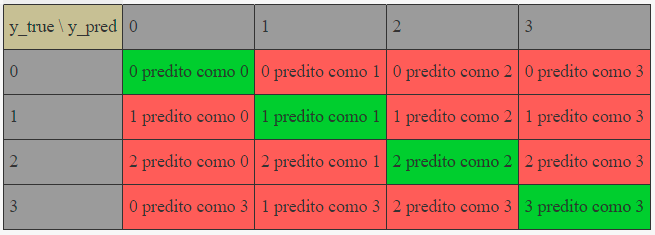

In [ ]:
confusion_matrix(y_test, y_pred_v2, labels=[0, 1, 2, 3])
# labels representa a ordem dos índices da matriz, de acordo com os valores das nossas classes

array([[145,   6,   0,   0],
       [  5, 139,   2,   0],
       [  0,  12, 131,   5],
       [  0,   0,   9, 146]])

Note que tivemos:

* **Classe 0:** 8 classificados como 1;
* **Classe 1:** 6 classificados como 0 e 5 como 2;
* **Classe 2:** 13 classificados como 1 e 10 como 3;
* **Classe 3:** 10 classificados como 2.

Note que, em todas as classes, somente tivemos erros com classes adjacentes (ex.: o modelo confundiu 1 com 0 e 2, mas não confundiu 1 com 3). 

Levando em conta que as classes representam preços de celulares, isso é um ponto positivo, pois significa que o modelo não confundiu um preço da categoria 0 (preço mais baixo) com a categoria 3 (preço mais alto), por exemplo.

## 7.2 Com normalização

Relembremos quais foram os melhores hiperparâmetros encontrados:

In [ ]:
gs_results_scaled.best_params_

{'metric': 'minkowski', 'n_neighbors': 44, 'p': 1, 'weights': 'uniform'}

In [ ]:
knn_v2_scaled = KNeighborsClassifier(metric='minkowski', n_neighbors=44, p=1, weights='uniform')
knn_v2_scaled.fit(X_train_scaled, y_train)
y_pred_v2_scaled = knn_v2_scaled.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_v2_scaled)

0.6783333333333333

In [ ]:
print(classification_report(y_test, y_pred_v2_scaled))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       151
           1       0.54      0.59      0.56       146
           2       0.58      0.56      0.57       148
           3       0.87      0.73      0.79       155

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.69      0.68      0.68       600



In [ ]:
confusion_matrix(y_test, y_pred_v2_scaled, labels=[0, 1, 2, 3])
# labels representa a ordem dos índices da matriz, de acordo com os valores das nossas classes

array([[125,  24,   2,   0],
       [ 39,  86,  21,   0],
       [  2,  46,  83,  17],
       [  0,   4,  38, 113]])

# 8 Conclusão

No notebook foi apresentado o KNN e seu funcionamento, bem como sua tunagem, treinamento e avaliação, fazendo a comparação com e sem a normalização dos dados. Os resultados obtidos indicaram que, nesse caso, a normalização não ajudou.

Obtivemos resultados muito melhores sem a normalização, alcançando uma acurácia de 93,5% no conjunto de teste, sendo que com a normalização a acurácia no conjunto de teste foi de 67,8%. Existem alguns possíveis motivos pelos quais a normalização pode não ter dado certo:

* A normalização reduziu a importância das variáveis numéricas que tinham a maior valor numérico, para que elas tivessem o mesmo peso no modelo que as demais. Porém, pode ser que justamente essas variáveis numéricas com valores maiores fossem as mais importantes para o modelo. Nesse caso, por reduzir a importância dessas variáveis, pode ter piorado o modelo;

* Como o KNN é baseado em distâncias e a normalização interfere no cálculo dessas distâncias, após o processo de normalização podemos ter prejudicado esse cálculo de distâncias e ter "perdido informação" dos dados.

* Também pode ser que o tipo de normalização que usamos não fosse o ideal, poderíamos testar outros tipos de normalização, como a Min Max e a Robust Scaler.

Como o dataset possui 4 classes para a variável resposta que estávamos prevendo, um modelo aleatório acertaria 1/4 = 25% das vezes. Diante disso, o resultado de 93,5% obtido é bastante satisfatório. Porém, provavelmente conseguiríamos resultados bem melhores usando modelos de classificação mais robustos, visto que o KNN é um dos modelos mais iniciais (se não o mais inicial) para classificação.